# Analyze generated files

In [1]:
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

from utils import df_from_csv, get_results_table

In [2]:
file_name = 'mixpanel_assessment_complete_events.csv'

df_assess = df_from_csv(file_name)
df_assess

,timestamp,distinct_id,response_id,url_name,categories,category_scores,question_labels,question_scores,total_score,phq_suicide,...,wsas_4,wsas_5,gs_mood_score,gs_wemwbs_score,gs_wsas_score,phq_gad_score,phq_dep_score,phq_mood_score,wemwbs_score,wsas_score
0,2020-08-12 05:42:12,000082ab-c331-48f7-a4e3-7cd1dd7daae5,1ab911b8-f108-4a6d-93de-0f9ab5f3f36c,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-31 10:25:12,000082ab-c331-48f7-a4e3-7cd1dd7daae5,8323ac61-82a9-44b7-b3a1-052823a66223,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31 16:39:07,000082ab-c331-48f7-a4e3-7cd1dd7daae5,72665e27-0d2e-409b-a58b-7923a431dba0,NaN,"['Humeur', ' Bien-être', ' Fonctionnement']","[8, 41, 20]","['Jamais', ' Plusieurs jours', ' Plusieurs jou...","[3, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 3, 3, 3, ...",72.0,3.0,...,4.0,4.0,4.0,41.0,20.0,8.0,8.0,4.0,41.0,20.0
3,2020-12-28 23:22:36,0000b5a9-a906-4e38-aa73-8416f6b0385a,65101fc3-bb6b-480f-aa00-c3f1e2d2f535,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-18 13:41:33,0000b5a9-a906-4e38-aa73-8416f6b0385a,26973c96-f01b-4e2c-bcf1-73cad3ded543,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376400,2022-01-14 22:44:30,fffec8b3-1f66-494a-a7ce-421c982dee38,eeec9669-c4b4-44b2-96c7-e50c398cb61f,NaN,"['Mood', ' Well-Being', ' Functioning']","[5, 39, 13]","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...",60.0,3.0,...,5.0,3.0,7.0,39.0,27.0,9.0,10.0,7.0,39.0,27.0
376401,2022-01-31 11:09:48,fffec8b3-1f66-494a-a7ce-421c982dee38,e24c69dd-6877-4d31-8f65-a26a03f4048b,NaN,"['Mood', ' Well-Being', ' Functioning']","[7, 43, 17]","[3, 1, 2, 2, 2, 3, 4, 1, 3, 2, 3, 4, 3, 3, 3, ...","[3, 1, 2, 2, 2, 3, 4, 1, 3, 2, 3, 4, 3, 3, 3, ...",70.0,3.0,...,5.0,2.0,5.0,43.0,23.0,9.0,8.0,5.0,43.0,23.0
376402,2022-02-28 10:27:40,fffec8b3-1f66-494a-a7ce-421c982dee38,499de492-7a49-4801-a748-851ce19ed5eb,NaN,"['Mood', ' Well-Being', ' Functioning']","[9, 45, 14]","[3, 2, 2, 3, 2, 4, 4, 1, 2, 2, 3, 4, 3, 3, 2, ...","[3, 2, 2, 3, 2, 4, 4, 1, 2, 2, 3, 4, 3, 3, 2, ...",71.0,3.0,...,4.0,6.0,3.0,45.0,26.0,8.0,7.0,3.0,45.0,26.0
376403,2021-01-24 22:35:04,ffff0ec5-b479-4d60-b16e-23267134b198,ae507450-ab55-47ca-992f-9d0be7dec065,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
file_name = 'mixpanel_users_assess_scores.csv'

df_assess_fl = df_from_csv(file_name)
df_assess_fl

,distinct_id,timestamp_first,response_id_first,url_name_first,categories_first,category_scores_first,question_labels_first,question_scores_first,total_score_first,phq_suicide_first,...,dep_diff,anx_diff,mood_diff,func_diff,wb_diff,dep_d,anx_d,mood_d,func_d,wb_d
0,000082ab-c331-48f7-a4e3-7cd1dd7daae5,2020-08-12 05:42:12,1ab911b8-f108-4a6d-93de-0f9ab5f3f36c,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",72.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0000b5a9-a906-4e38-aa73-8416f6b0385a,2020-12-28 23:22:36,65101fc3-bb6b-480f-aa00-c3f1e2d2f535,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",94.0,3.0,...,-2.0,0.0,-2.0,0.0,1.0,-1.843472,0.000000,-1.052851,0.000000,0.175960
2,0000cbfe-c429-4547-9c3e-06e9ec366bbd,2022-01-19 11:51:05,abfd64c6-ffc0-4c6a-9ce4-4adaf4863c99,NaN,"['Mood', ' Well-Being', ' Functioning']","[2, 23, 22]","[3, 0, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, ...","[3, 0, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, ...",50.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0000e58e-3f7b-4b23-af42-2af3253a3950,2021-05-09 09:52:11,06383e4d-b4de-4b77-840f-c4ddf7c34d2c,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000fb50-a065-4082-9baf-374e85ee5e42,2022-01-14 16:33:25,0651fc79-82b8-44b0-b2ab-8c5aeef734e4,NaN,"['Mood', ' Well-Being', ' Functioning']","[8, 36, 28]","[2, 2, 2, 2, 2, 3, 3, 2, 3, 4, 4, 2, 2, 2, 1, ...","[2, 2, 2, 2, 2, 3, 3, 2, 3, 4, 4, 2, 2, 2, 1, ...",74.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159938,fffd12df-bc74-4d4d-964d-affef487ab75,2020-07-30 02:23:18,c4ee57bc-3a18-448b-b9f7-4aa530b62ac9,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159939,fffd89db-6dec-454b-afc0-624d420c3317,2020-06-10 11:37:17,e349c599-c0ca-47d9-8def-d88a9f917d72,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159940,fffec8b3-1f66-494a-a7ce-421c982dee38,2022-01-14 22:44:30,eeec9669-c4b4-44b2-96c7-e50c398cb61f,NaN,"['Mood', ' Well-Being', ' Functioning']","[5, 39, 13]","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...",60.0,3.0,...,-3.0,-1.0,-4.0,-1.0,6.0,-2.765208,-0.918479,-2.105702,-0.201723,1.055763
159941,ffff0ec5-b479-4d60-b16e-23267134b198,2021-01-24 22:35:04,ae507450-ab55-47ca-992f-9d0be7dec065,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_tmp = df_assess_fl[df_assess_fl['timestamp_first'] >= '2022-01-01']

len(df_tmp[df_tmp.phq_mood_score_first <= 2])/len(df_tmp)

0.15456147220046984

In [5]:
len(df_assess_fl[df_assess_fl['timestamp_first'] >= '2022-01-01'])

20432

In [6]:
file_name = 'mixpanel_use_resource_events.csv'

df_use_resource = df_from_csv(file_name)
df_use_resource

,timestamp,event,distinct_id,url,browser,browser_version,device,initial_referrer,initial_referring_domain,os,...,categories,category_scores,question_labels,question_scores,total_score,total_score_normalized,mp_country_code,city,radio,region
9,2020-04-07 10:48:16,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://app.mindwellu.com/canada/en/welcome.html,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2020-04-07 10:48:20,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2020-04-07 10:48:20,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-04-07 10:48:27,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://thepath-ca.taoconnect.org/local/self_h...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2020-04-07 10:48:49,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://homewood-production.s3.amazonaws.com/E...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934495,2022-03-31 23:12:46,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://canada.welltrack.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934496,2022-03-31 23:13:25,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://app.mindwellu.com/wtcanada,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934505,2022-03-31 23:13:58,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://canada.welltrack.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934507,2022-03-31 23:14:13,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://wellness.breakingfreeonline.ca/languag...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
file_name = 'mixpanel_use_resource_unduplicated_events.csv'

df_accesses = df_from_csv(file_name)

In [8]:
df_accesses

,timestamp,event,distinct_id,url,browser,browser_version,device,initial_referrer,initial_referring_domain,os,...,categories,category_scores,question_labels,question_scores,total_score,total_score_normalized,mp_country_code,city,radio,region
9,2020-04-07 10:48:16,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://app.mindwellu.com/canada/en/welcome.html,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2020-04-07 10:48:20,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2020-04-07 10:48:20,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-04-07 10:48:27,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://thepath-ca.taoconnect.org/local/self_h...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2020-04-07 10:48:49,Access Resource,54b836dd-53da-48d6-aca7-9bad43ba6713,https://homewood-production.s3.amazonaws.com/E...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934495,2022-03-31 23:12:46,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://canada.welltrack.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934496,2022-03-31 23:13:25,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://app.mindwellu.com/wtcanada,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934505,2022-03-31 23:13:58,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://canada.welltrack.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934507,2022-03-31 23:14:13,Access Resource,fd2dab46-b8b0-41fd-8641-6558f2fe49ef,https://wellness.breakingfreeonline.ca/languag...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
file_name = 'df_first_access.csv'
df_first_access = df_from_csv(file_name)

In [10]:
df_first_access

,timestamp_access,event,url,browser,browser_version,device,initial_referrer,initial_referring_domain,os,referrer,...,categories,category_scores,question_labels,question_scores,total_score,total_score_normalized,mp_country_code,city,radio,region
distinct_id,,,,,,,,,,,,,,,,,,,,,
0000b5a9-a906-4e38-aa73-8416f6b0385a,2020-12-28 23:27:28,Access Resource,https://kidshelpphone.ca/get-info/breathing-ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000176d1-0a33-489e-90b1-5fa9692279d0,2020-12-25 21:08:39,Access Resource,/self_guided/0b316917-cf3f-4edc-91bb-b8b2d6797...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001fc58-f2ef-48e7-8622-d83c34fcf74a,2021-02-22 18:59:26,Access Resource,/self_guided/965a854e-88af-40fa-ab25-fea114375...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003a098-b80a-4cd0-9925-b3a68d049d89,2020-06-26 22:08:45,Access Resource,https://app.breathingroom.me/wellness_together...,Chrome,97.0,Android,$direct,$direct,Android,https://www.google.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00045f15-7b5c-4493-9e27-28cb1c154d14,2020-04-22 09:55:38,Access Resource,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbc381-1c18-4f09-8861-ba7b18f30f72,2021-01-22 14:14:15,Access Resource,https://app.breathingroom.me/wellness_together...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffbdfb6-5555-4b9d-a2fa-66f5bd6ba9ce,2021-01-12 12:56:36,Access Resource,/self_guided/67e317e0-2bdb-4164-ac65-a1eca1c99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffd89db-6dec-454b-afc0-624d420c3317,2020-06-10 11:38:18,Access Resource,/self_guided/fffd89db-6dec-454b-afc0-624d420c3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
file_name = 'mixpanel_users_outerjoin.csv'

df_first_access_merged = df_from_csv(file_name)

In [12]:
df_first_access_merged

,distinct_id,timestamp_access,event,url,browser,browser_version,device,initial_referrer,initial_referring_domain,os,...,city,radio,region,timestamp_signup,timestamp_assess,assess_count,language_last,time_to_access,time_to_access_30,access_count
0,0000b5a9-a906-4e38-aa73-8416f6b0385a,2020-12-28 23:27:28,Access Resource,https://kidshelpphone.ca/get-info/breathing-ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-12-28 23:16:28,2020-12-28 23:22:45,4.0,en-ca,0 days 00:11:00,True,2.0
1,000176d1-0a33-489e-90b1-5fa9692279d0,2020-12-25 21:08:39,Access Resource,/self_guided/0b316917-cf3f-4edc-91bb-b8b2d6797...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-12-25 20:56:50,2020-12-25 21:03:55,8.0,fr-ca,0 days 00:11:49,True,7.0
2,0001fc58-f2ef-48e7-8622-d83c34fcf74a,2021-02-22 18:59:26,Access Resource,/self_guided/965a854e-88af-40fa-ab25-fea114375...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-02-22 18:54:55,2021-02-22 18:58:36,1.0,en-ca,0 days 00:04:31,True,5.0
3,0003a098-b80a-4cd0-9925-b3a68d049d89,2020-06-26 22:08:45,Access Resource,https://app.breathingroom.me/wellness_together...,Chrome,97.0,Android,$direct,$direct,Android,...,NaN,NaN,NaN,2020-06-26 22:02:01,2020-06-26 22:07:09,7.0,en-ca,0 days 00:06:44,True,8.0
4,00045f15-7b5c-4493-9e27-28cb1c154d14,2020-04-22 09:55:38,Access Resource,https://canada.welltrack.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-04-22 09:50:52,NaN,1.0,en-ca,0 days 00:04:46,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421087,fffa8503-416a-41b2-a5d5-b5fc8674880e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-01-08 12:52:41,2021-01-08 12:58:28,2.0,fr-ca,NaN,False,NaN
421088,fffc5112-507b-40ee-9670-1fbcdcf82c33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-06-04 15:55:47,2021-06-04 16:02:16,1.0,en-ca,NaN,False,NaN
421089,fffcb1ed-adda-4e44-8937-43522f066afd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-01-04 02:44:44,NaN,NaN,en-ca,NaN,False,NaN
421090,fffd12df-bc74-4d4d-964d-affef487ab75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-07-30 02:20:00,2020-07-30 02:23:21,1.0,NaN,NaN,False,NaN


In [13]:
print('accessed resource: ', df_first_access_merged['timestamp_access'].count())
print('accessed in 30   : ', df_first_access_merged['time_to_access_30'].sum())
print('initial assess   : ', df_first_access_merged['timestamp_assess'].count())
print('assess > 1       : ', (df_first_access_merged['assess_count'] > 1).sum())
print('access > 0       : ', (df_first_access_merged['access_count'] > 0).sum())

accessed resource:  351649
accessed in 30   :  91580
initial assess   :  149139
assess > 1       :  55853
access > 0       :  351649


In [14]:
file_name = 'df_access_count.csv'

df_access_count = df_from_csv(file_name)

In [15]:
df_access_count

,distinct_id,access_count
0,0000b5a9-a906-4e38-aa73-8416f6b0385a,2
1,000176d1-0a33-489e-90b1-5fa9692279d0,7
2,0001fc58-f2ef-48e7-8622-d83c34fcf74a,5
3,0003a098-b80a-4cd0-9925-b3a68d049d89,8
4,00045f15-7b5c-4493-9e27-28cb1c154d14,1
...,...,...
351644,fffbc381-1c18-4f09-8861-ba7b18f30f72,7
351645,fffbdfb6-5555-4b9d-a2fa-66f5bd6ba9ce,1
351646,fffd89db-6dec-454b-afc0-624d420c3317,2
351647,ffff0ec5-b479-4d60-b16e-23267134b198,2


In [16]:
file_name = 'mixpanel_users_assessments.csv'

df_assess_fl_access = df_from_csv(file_name)

In [17]:
df_assess_fl_access

,distinct_id,timestamp_first,response_id_first,url_name_first,categories_first,category_scores_first,question_labels_first,question_scores_first,total_score_first,phq_suicide_first,...,anx_diff,mood_diff,func_diff,wb_diff,dep_d,anx_d,mood_d,func_d,wb_d,access_count
0,000082ab-c331-48f7-a4e3-7cd1dd7daae5,2020-08-12 05:42:12,1ab911b8-f108-4a6d-93de-0f9ab5f3f36c,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",72.0,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0000b5a9-a906-4e38-aa73-8416f6b0385a,2020-12-28 23:22:36,65101fc3-bb6b-480f-aa00-c3f1e2d2f535,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",94.0,3.0,...,0.0,-2.0,0.0,1.0,-1.843472,0.000000,-1.052851,0.000000,0.175960,2.0
2,0000cbfe-c429-4547-9c3e-06e9ec366bbd,2022-01-19 11:51:05,abfd64c6-ffc0-4c6a-9ce4-4adaf4863c99,NaN,"['Mood', ' Well-Being', ' Functioning']","[2, 23, 22]","[3, 0, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, ...","[3, 0, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, ...",50.0,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0000e58e-3f7b-4b23-af42-2af3253a3950,2021-05-09 09:52:11,06383e4d-b4de-4b77-840f-c4ddf7c34d2c,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0000fb50-a065-4082-9baf-374e85ee5e42,2022-01-14 16:33:25,0651fc79-82b8-44b0-b2ab-8c5aeef734e4,NaN,"['Mood', ' Well-Being', ' Functioning']","[8, 36, 28]","[2, 2, 2, 2, 2, 3, 3, 2, 3, 4, 4, 2, 2, 2, 1, ...","[2, 2, 2, 2, 2, 3, 3, 2, 3, 4, 4, 2, 2, 2, 1, ...",74.0,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159938,fffd12df-bc74-4d4d-964d-affef487ab75,2020-07-30 02:23:18,c4ee57bc-3a18-448b-b9f7-4aa530b62ac9,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
159939,fffd89db-6dec-454b-afc0-624d420c3317,2020-06-10 11:37:17,e349c599-c0ca-47d9-8def-d88a9f917d72,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
159940,fffec8b3-1f66-494a-a7ce-421c982dee38,2022-01-14 22:44:30,eeec9669-c4b4-44b2-96c7-e50c398cb61f,NaN,"['Mood', ' Well-Being', ' Functioning']","[5, 39, 13]","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...","[3, 1, 2, 0, 2, 3, 3, 2, 1, 1, 3, 4, 3, 3, 3, ...",60.0,3.0,...,-1.0,-4.0,-1.0,6.0,-2.765208,-0.918479,-2.105702,-0.201723,1.055763,0.0
159941,ffff0ec5-b479-4d60-b16e-23267134b198,2021-01-24 22:35:04,ae507450-ab55-47ca-992f-9d0be7dec065,NaN,"[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [18]:
len(df_assess_fl_access[df_assess_fl_access['timestamp_first'] > '2021-07-01'])

35838

In [19]:
df_14 = df_assess_fl_access[df_assess_fl_access['total_time'] >= 14]

df_14 = df_14[df_14['timestamp_first'] <= '2022-03-31']
df_14 = df_14[df_14['timestamp_first'] >= '2021-07-01']
print(len(df_14))

df_14 = df_14[df_14['access_count'] >= 1]
print(len(df_14))

9588
6149


In [20]:
df_14

,distinct_id,timestamp_first,response_id_first,url_name_first,categories_first,category_scores_first,question_labels_first,question_scores_first,total_score_first,phq_suicide_first,...,anx_diff,mood_diff,func_diff,wb_diff,dep_d,anx_d,mood_d,func_d,wb_d,access_count
25,000785a5-14ca-4dd6-b47a-170111999276,2022-02-15 11:50:04,abe5c0af-2972-4822-b294-a09ba41404d4,NaN,"['Mood', ' Well-Being', ' Functioning']","[5, 33, 18]","['Several days', ' More than half the days', '...","[2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, ...",58.0,2.0,...,-1.0,-2.0,-5.0,5.0,-0.921736,-0.918479,-1.052851,-1.008614,0.879802,1.0
52,0012d3f4-2781-4c5e-8375-4ac39dcae904,2021-12-31 01:54:22,1521f549-627c-4b10-adb8-c83eca195cc3,NaN,"['Mood', ' Well-Being', ' Functioning']","[8, 29, 27]","['Not at all', ' More than half the days', ' S...","[3, 1, 2, 3, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, ...",67.0,3.0,...,-1.0,1.0,-1.0,-9.0,1.843472,-0.918479,0.526426,-0.201723,-1.583644,4.0
119,00362fbb-53e4-465d-86a3-c5dfca834d16,2021-12-13 00:44:58,027bbbb6-4d4b-449a-8845-77b7821411a6,NaN,"['Mood', ' Well-Being', ' Functioning']","[4, 43, 23]","['Not at all', ' Nearly every day', ' Several ...","[3, 0, 2, 0, 2, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, ...",73.0,3.0,...,0.0,-2.0,-5.0,2.0,-1.843472,0.000000,-1.052851,-1.008614,0.351921,3.0
129,0038a173-587c-4a58-886b-fb7dc0f1ed77,2021-08-25 15:49:47,cf64f4c2-897d-4c3e-b9ea-2cff77186a55,NaN,"['Mood', ' Well-Being', ' Functioning']","[4, 33, 20]","['Not at all', ' Several days', ' More than ha...","[3, 2, 1, 1, 0, 3, 4, 3, 3, 2, 2, 3, 2, 2, 2, ...",60.0,3.0,...,-1.0,-2.0,0.0,1.0,-0.921736,-0.918479,-1.052851,0.000000,0.175960,1.0
211,00613726-449a-4ba2-9e5c-9c992885892f,2021-09-08 08:02:21,ffee6b67-4afc-4948-ad81-c62048722c72,NaN,"['Mood', ' Well-Being', ' Functioning']","[9, 50, 23]","['Not at all', ' Several days', ' More than ha...","[3, 2, 1, 3, 3, 4, 4, 3, 3, 2, 3, 4, 4, 3, 3, ...",85.0,3.0,...,1.0,1.0,-8.0,5.0,0.000000,0.918479,0.526426,-1.613783,0.879802,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159794,ffbca2ad-9fd4-486c-98ea-6fd4e8c61e3b,2021-12-04 01:11:29,479d7522-ac79-43cd-89fd-86991958ab6a,NaN,"['Mood', ' Well-Being', ' Functioning']","[2, 22, 11]","['More than half the days', ' More than half t...","[1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, ...",36.0,1.0,...,2.0,0.0,0.0,4.0,-1.843472,1.836959,0.000000,0.000000,0.703842,1.0
159797,ffbe71b5-980d-428a-b2f4-b8420c086e4a,2022-02-02 11:11:05,ec789c91-54b4-4d5a-88bd-5a6a48a634c6,NaN,"['Mood', ' Well-Being', ' Functioning']","[8, 41, 23]","['Not at all', ' Several days', ' Several days...","[3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, ...",75.0,3.0,...,1.0,3.0,10.0,-7.0,1.843472,0.918479,1.579277,2.017228,-1.231723,1.0
159862,ffdcf63b-16c0-4572-a0b0-151fa958071a,2021-08-11 22:12:13,201b6f82-52db-4b20-9a97-0ff74e1123ed,NaN,"['Mood', ' Well-Being', ' Functioning']","[10, 55, 38]","['Not at all', ' Several days', ' Several days...","[3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, ...",106.0,3.0,...,-1.0,-1.0,-2.0,1.0,0.000000,-0.918479,-0.526426,-0.403446,0.175960,1.0
159925,fff68bf6-0a92-4d35-8140-2f4608f0e708,2021-07-13 00:41:31,4b0daf41-220c-4fb7-8725-85e1492a80f5,NaN,"['Mood', ' Well-Being', ' Functioning']","[11, 38, 25]","['Not at all', ' Several days', ' Not at all',...","[3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, ...",77.0,3.0,...,1.0,2.0,1.0,-3.0,0.921736,0.918479,1.052851,0.201723,-0.527881,4.0


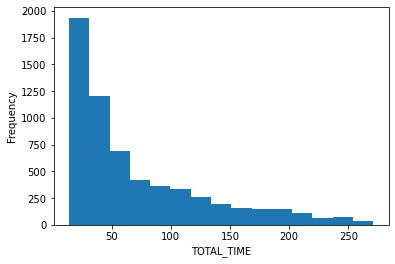

In [21]:
ax = df_14['total_time'].plot(kind='hist', bins=15)
ax.set_xlabel('TOTAL_TIME')
ax.set_ylabel('Frequency')
plt.show()

In [22]:
headers = ['var', 'diff', 'sd', 'd']
score_vars = ['mood_diff', 'dep_diff', 'anx_diff', 'wb_diff', 'func_diff']
score_labels = ['mood', 'dep', 'anx', 'wb', 'func']

get_results_table(df_14, headers, score_vars, score_labels, d=True)

var,diff,sd,d
mood,-1.48,3.19,-0.46
dep,-0.71,1.85,-0.38
anx,-0.77,1.84,-0.42
wb,3.31,9.20,0.36
func,-1.66,8.39,-0.20


In [23]:
x = stats.zscore(df_14.access_count)

y = stats.zscore(df_14.mood_diff)
model_mood = sm.OLS(y, x , missing='drop').fit()

corr_mood = df_14[['mood_diff','access_count']].corr()

y = df_14.dep_diff
model_dep = sm.OLS(y, x , missing='drop').fit()

y = df_14.anx_diff
model_anx = sm.OLS(y, x , missing='drop').fit()

y = stats.zscore(df_14.wb_diff)
model_wb = sm.OLS(y,x , missing='drop').fit()

corr_wb = df_14[['wb_diff','access_count']].corr()

y = stats.zscore(df_14.func_diff)
model_func = sm.OLS(y,x , missing='drop').fit()

corr_func = df_14[['func_diff','access_count']].corr()

In [24]:
print(model_mood.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.112
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.292
Time:                        02:37:33   Log-Likelihood:                         -8724.5
No. Observations:                6149   AIC:                                  1.745e+04
Df Residuals:                    6148   BIC:                                  1.746e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
print(corr_mood)

              mood_diff  access_count
mood_diff      1.000000      0.013449
access_count   0.013449      1.000000


In [26]:
print(model_mood.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.112
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.292
Time:                        02:37:34   Log-Likelihood:                         -8724.5
No. Observations:                6149   AIC:                                  1.745e+04
Df Residuals:                    6148   BIC:                                  1.746e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
print(model_dep.summary())

                                 OLS Regression Results                                
Dep. Variable:               dep_diff   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.2679
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.605
Time:                        02:37:34   Log-Likelihood:                         -12925.
No. Observations:                6149   AIC:                                  2.585e+04
Df Residuals:                    6148   BIC:                                  2.586e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
print(model_anx.summary())

                                 OLS Regression Results                                
Dep. Variable:               anx_diff   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.374
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.241
Time:                        02:37:34   Log-Likelihood:                         -12980.
No. Observations:                6149   AIC:                                  2.596e+04
Df Residuals:                    6148   BIC:                                  2.597e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
print(model_wb.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.3026
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.582
Time:                        02:37:35   Log-Likelihood:                         -8724.9
No. Observations:                6149   AIC:                                  1.745e+04
Df Residuals:                    6148   BIC:                                  1.746e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
print(corr_wb)

               wb_diff  access_count
wb_diff       1.000000     -0.007015
access_count -0.007015      1.000000


In [31]:
print(model_func.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.228
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                       0.136
Time:                        02:37:35   Log-Likelihood:                         -8723.9
No. Observations:                6149   AIC:                                  1.745e+04
Df Residuals:                    6148   BIC:                                  1.746e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
print(corr_func)

              func_diff  access_count
func_diff      1.000000      0.019034
access_count   0.019034      1.000000


In [33]:
df_14[['access_count', 'wb_diff']].corr()

,access_count,wb_diff
access_count,1.000000,-0.007015
wb_diff,-0.007015,1.000000


In [34]:
df_14.access_count

25        1.0
52        4.0
119       3.0
129       1.0
211       2.0
         ... 
159794    1.0
159797    1.0
159862    1.0
159925    4.0
159934    1.0
Name: access_count, Length: 6149, dtype: float64